# 게임 기본 정보(점수, 긍정 리뷰수, 부정 리뷰수, 장르)

In [1]:
# 게임 태그(하위 장르, 테마)
warframe_tags = ['Action RPG','Looter Shooter','Third-Person Shooter','Action','RPG','Third Person','Character Customization','Massively Multiplayer','Online Co-Op','Co-op','PvE','Singleplayer','Sci-fi','Space','Lore-Rich','Shooter','Hack and Slash,''Parkour','Ninja']
thefirst_tags = ['Free to Play','Sexual Content','Looter Shooter','Multiplayer','Third-Person Shooter','RPG','Online Co-Op','Action','Shooter','Third Person','Action RPG','Singleplayer','Adventure','Character Customization','Sci-fi','Co-op','PvE','Story Rich','Combat','Violent']
destiny_tags = ['Free to Play','Open World','Looter Shooter','Multiplayer','FPS','MMORPG','Co-op','PvE','PvP','Shooter','Massively Multiplayer','Loot','First-Person','Sci-fi','Action','Adventure','Lore-Rich','Space','Competitive','Atmospheric']

# The First Descendant와 공통 태그
# 1. Destiny2와의 공통 태그
print('공통 태그 리스트:',list(set(thefirst_tags) & set(destiny_tags)))
print('공통 태그 개수:',len(list(set(thefirst_tags) & set(destiny_tags))))

# 2. Warframe과의 공통 태그
print('공통 태그 리스트:',list(set(thefirst_tags) & set(warframe_tags)))
print('공통 태그 개수:',len(list(set(thefirst_tags) & set(warframe_tags))))


# 모든 게임의 정보
warframe_info = {'Steam DB Rating':86.36, 'Positive reviews':532654, 'Negative reviews':79384, 'Genre':warframe_tags}
destiny_info = {'Steam DB Rating':79.31, 'Positive reviews':493350, 'Negative reviews':124477, 'Genre':destiny_tags}
thefirst_info = {'Steam DB Rating':56.92, 'Positive reviews':55833, 'Negative reviews':41871, 'Genre':thefirst_tags}


공통 태그 리스트: ['Multiplayer', 'Action', 'Adventure', 'Looter Shooter', 'Shooter', 'Sci-fi', 'Free to Play', 'PvE', 'Co-op']
공통 태그 개수: 9
공통 태그 리스트: ['Character Customization', 'Third-Person Shooter', 'Action', 'Looter Shooter', 'Action RPG', 'Shooter', 'Singleplayer', 'Third Person', 'RPG', 'Sci-fi', 'Online Co-Op', 'PvE', 'Co-op']
공통 태그 개수: 13


# 호불호 데이터

In [23]:
import pandas as pd

# destiny 2
destiny_reviews = pd.read_csv('호불호 비율/destiny total.csv')

# warframe
warframe_reviews = pd.read_csv('호불호 비율/warframe total.csv')

# the first descendant
thefirst_reviews = pd.read_csv('호불호 비율/the first total.csv')

## 호불호 비율 그래프

In [24]:
# Convert 'DateTime' to datetime format for easier manipulation
thefirst_reviews['DateTime'] = pd.to_datetime(thefirst_reviews['DateTime'])

# Define a function to categorize the date into bi-monthly periods
def categorize_date(date):
    if date.day <= 15:
        return f"{date.year}-{date.month:02d} Early"  # e.g., "2024-07 Early"
    else:
        return f"{date.year}-{date.month:02d} Late"  # e.g., "2024-07 Late"

# Apply the categorization function to create a 'Period' column
thefirst_reviews['Period'] = thefirst_reviews['DateTime'].apply(categorize_date)

# Group data by the 'Period' column and aggregate the reviews
thefirst_grouped = thefirst_reviews.groupby('Period', as_index=False).agg({
    'Positive reviews': 'sum',
    'Negative reviews': 'sum'
})

thefirst_grouped['Positive reviews'] = thefirst_grouped['Positive reviews'].astype(int)
thefirst_grouped['Negative reviews'] = thefirst_grouped['Negative reviews'].astype(int)

# Sort the grouped data by year-month order
thefirst_grouped['Sort_Key'] = pd.to_datetime(thefirst_grouped['Period'].str.split().str[0], format='%Y-%m')
thefirst_grouped = thefirst_grouped.sort_values(by=['Sort_Key', 'Period']).drop(columns=['Sort_Key'])

# Display the grouped data
print(thefirst_grouped)

           Period  Positive reviews  Negative reviews
0    2024-06 Late               259               -54
1   2024-07 Early             29815            -26161
2    2024-07 Late              8800             -5785
3   2024-08 Early              3735             -2654
4    2024-08 Late              2302             -2590
5   2024-09 Early              1866             -1489
6    2024-09 Late              1022              -902
7   2024-10 Early               912              -606
8    2024-10 Late               787              -433
9   2024-11 Early               564              -234
10   2024-11 Late              2519              -355
11  2024-12 Early              1960              -248
12   2024-12 Late               614              -151
13  2025-01 Early               459              -152
14   2025-01 Late               219               -65


# 동접 추이

### 데이터 불러오기

In [1]:
# 동접자 파일 불러오기
import pandas as pd

warframe_users = pd.read_csv('동시접속자/워프레임 동접.csv')
destiny_users = pd.read_csv('동시접속자/데스티니 동접.csv')
thefirst_users = pd.read_csv('동시접속자/국산 동접.csv')

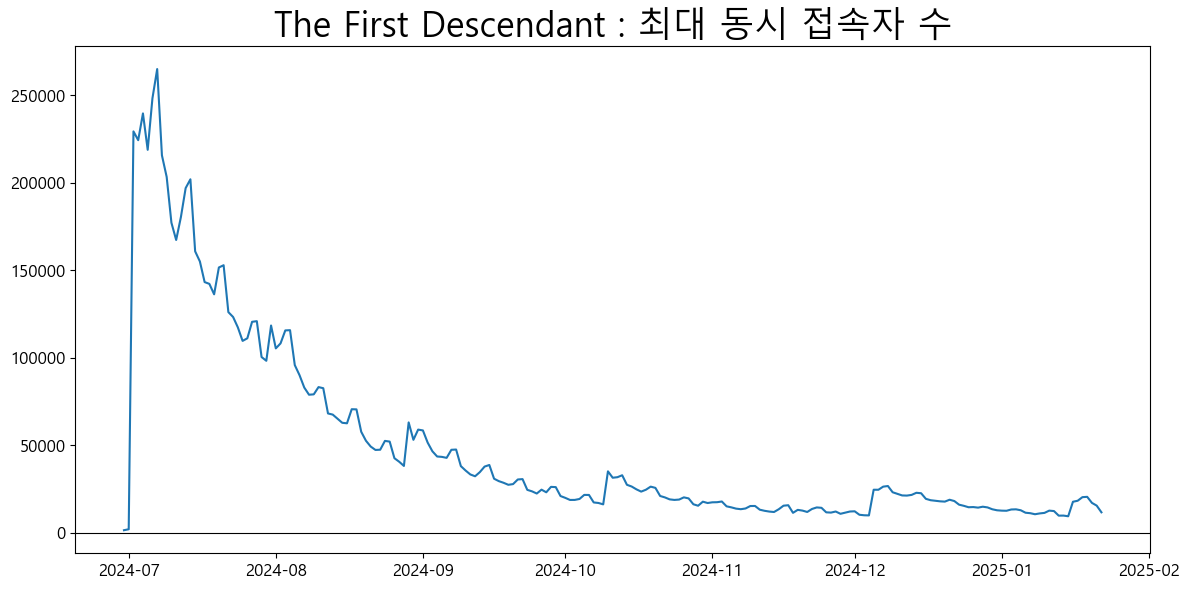

In [18]:
import matplotlib
import matplotlib.pyplot as plt

# Convert 'DateTime' to datetime format for easier manipulation
thefirst_users['Date'] = pd.to_datetime(thefirst_users['Date'])


# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 '맑은 고딕'
plt.rcParams['axes.unicode_minus'] = False 

# Plotting an "inverted pyramid" style graph for positive and negative counts
plt.figure(figsize=(12, 6))

# 데이터
plt.plot(thefirst_users['Date'], thefirst_users['Players'])

# Customize the plot
plt.title('The First Descendant : 최대 동시 접속자 수', fontsize=25)
# plt.xlabel('Date', fontsize=9)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at y=0
plt.tight_layout()

# Show the plot
plt.show()

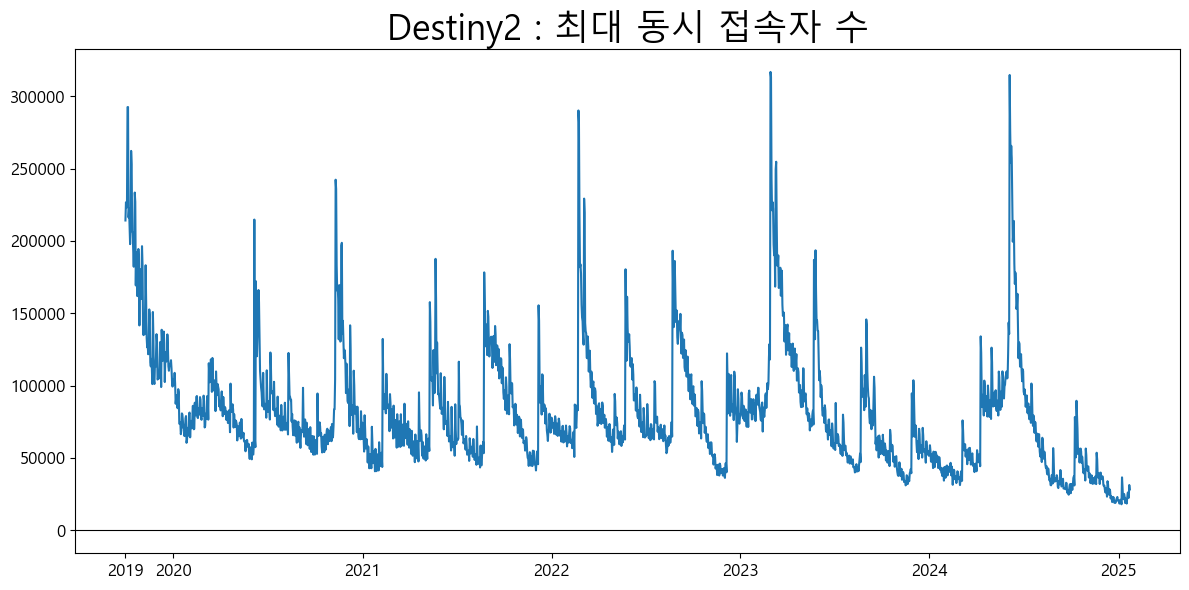

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 '맑은 고딕'
plt.rcParams['axes.unicode_minus'] = False

# DateTime 열을 datetime 형식으로 변환
destiny_users['Date'] = pd.to_datetime(destiny_users['Date'])

# 날짜 및 동시 접속자 수 데이터 준비
destiny_users_sorted = destiny_users.sort_values(by='Date')  # 날짜 순으로 정렬
dates = destiny_users_sorted['Date']
players = destiny_users_sorted['Players']

# 연도별 표시를 위해 고유 연도 추출
unique_years = sorted(set(dates.dt.year))
year_ticks = [dates[dates.dt.year == year].iloc[0] for year in unique_years]  # 각 연도의 첫 번째 날짜 가져오기

# 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(dates, players, label='동시 접속자 수')

# 그래프 꾸미기
plt.title('Destiny2 : 최대 동시 접속자 수', fontsize=25)
plt.yticks(fontsize=12)

# x축 범례 설정: 연도 단위로 설정
plt.xticks(year_ticks, unique_years, fontsize=12)

# y축 기준선 설정
plt.axhline(0, color='black', linewidth=0.8)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()


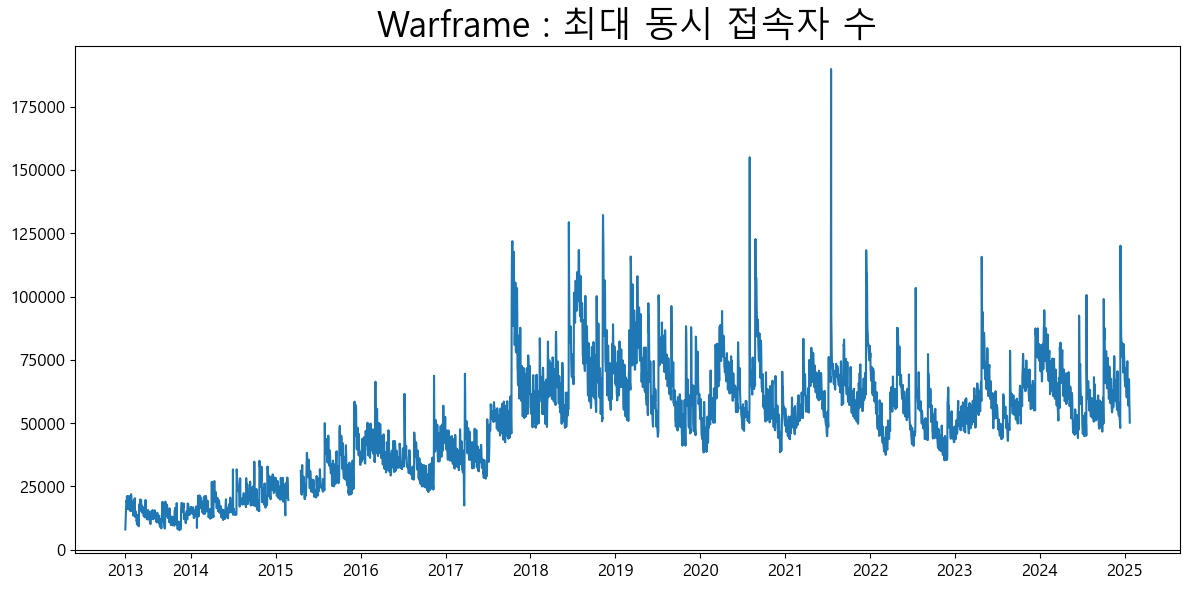

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 '맑은 고딕'
plt.rcParams['axes.unicode_minus'] = False

# DateTime 열을 datetime 형식으로 변환
warframe_users['Date'] = pd.to_datetime(warframe_users['Date'])

# 날짜 및 동시 접속자 수 데이터 준비
warframe_users_sorted = warframe_users.sort_values(by='Date')  # 날짜 순으로 정렬
dates = warframe_users_sorted['Date']
players = warframe_users_sorted['Players']

# 연도별 표시를 위해 고유 연도 추출
unique_years = sorted(set(dates.dt.year))
year_ticks = [dates[dates.dt.year == year].iloc[0] for year in unique_years]  # 각 연도의 첫 번째 날짜 가져오기

# 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(dates, players, label='동시 접속자 수')

# 그래프 꾸미기
plt.title('Warframe : 최대 동시 접속자 수', fontsize=25)
plt.yticks(fontsize=12)

# x축 범례 설정: 연도 단위로 설정
plt.xticks(year_ticks, unique_years, fontsize=12)

# y축 기준선 설정
plt.axhline(0, color='black', linewidth=0.8)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()
